This notebooks investigates natura.tiff structure. That is a raster file which contains data on protected and reserved areas. We need take them into account when calculating the renewable potential across the area.

## Preparation

### Set main directory to root folder

In [1]:
# change current directory
import os
import sys

# change current directory to pypsa-earth folder
os.chdir("../../../pypsa-earth")

cutout_name = "ar_test-2013jan-era5.nc"
cutout_path = os.path.realpath("cutouts") + "/" + cutout_name

natura_tiff_path = os.path.realpath("resources") + "/natura.tiff"

### Import packages

In [19]:
import atlite
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pyproj
import rasterio as rio
import shapely

from rasterio.warp import calculate_default_transform, reproject, Resampling, transform_bounds
from shapely.geometry import box, Polygon
from shapely.ops import transform

### Load cutout and natura.tiff

In [20]:
nc_data = atlite.Cutout(cutout_path)
print(nc_data)

<Cutout "ar_test-2013jan-era5">
 x = -74.10 ⟷ -52.20, dx = 0.30
 y = -58.80 ⟷ -21.30, dy = 0.30
 time = 2013-01-01 ⟷ 2013-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']


In [21]:
data = rio.open(natura_tiff_path)
print(data.crs)

ESRI:54009


### Extract the outer shape

In [22]:
# extract data outer shape
nc_geom = shapely.wkt.loads(box(*nc_data.bounds).wkt)
tiff_geom_orig = shapely.wkt.loads(box(*data.bounds).wkt)

In [23]:
# re-project coordinates
era5_crs = pyproj.CRS("EPSG:4326")
tiff_crs = pyproj.CRS(data.crs)
plcarre_crs = pyproj.CRS("EPSG:32663")

#### Cylindrical projection

In [24]:
project_tiff = pyproj.Transformer.from_crs(tiff_crs, era5_crs, always_xy=True).transform
project_era5 = pyproj.Transformer.from_crs(era5_crs, era5_crs, always_xy=True).transform

tiff_geom = transform(project_tiff, tiff_geom_orig)
era5_geom = transform(project_era5, nc_geom)

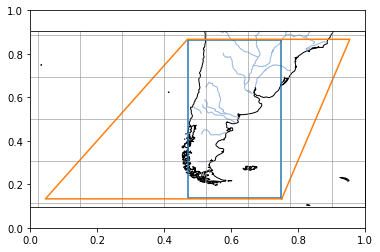

In [25]:
fig, ax = plt.subplots()
ax2 = plt.axes(projection = ccrs.PlateCarree())
ax2.coastlines()
plt.plot(*nc_geom.exterior.xy)
#plt.plot(*era5_geom.exterior.xy)
plt.plot(*tiff_geom.exterior.xy)
ax2.add_feature(cfeature.RIVERS)
# plt.rcParams['axes.grid'] = True
# plt.grid(True)
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
    linewidth=1, color='gray', alpha=0.5, linestyle='-')
# plt.savefig("natura_cutout_coastlines2_argentina.pdf")

#### Mollweide pseudo-cylindrical projection

In [26]:
# experiment with non-cylindr projection
project_tiff_2 = pyproj.Transformer.from_crs(tiff_crs, tiff_crs, always_xy=True).transform
project_era5_2 = pyproj.Transformer.from_crs(era5_crs, tiff_crs, always_xy=True).transform


tiff_geom2 = transform(project_tiff_2, tiff_geom_orig)
era5_geom2 = transform(project_era5_2, nc_geom)

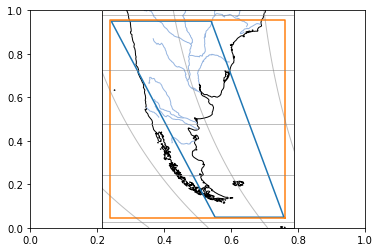

In [28]:
fig, ax = plt.subplots()
ax2 = plt.axes(projection = ccrs.Mollweide())
ax2.coastlines()
plt.plot(*era5_geom2.exterior.xy)
plt.plot(*tiff_geom2.exterior.xy)
ax2.add_feature(cfeature.RIVERS)
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
    linewidth=1, color='gray', alpha=0.5, linestyle='-')